<h2>Kelompok 11

In [2]:
# Nama - NIM

# Dwisyah Ahmad Rizky - 16520450
# Hilman Dzaki Mubarok - 16520440
# M Syahrul Surya Putra - 16520430
# Zafran Divac Azzahra - 16520460

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

dftemp = pd.read_csv("DataGooglePlayStore.csv")

<h2>Data Cleansing

In [4]:
# Mengecek kekosongan data
print(dftemp.info())

# Menghilangkan baris data yang memiliki value kosong
df = dftemp.dropna(axis = 0, how = "any").reset_index(drop=True)

# Menghilangkan baris data yang memiliki dubplicate value pada kolom App
df = df.drop_duplicates(subset = ["App"]).reset_index(drop=True)

# Menghilangkan baris data yang memiliki rating negatif (rating paling kecil ialah 0)
df = df.loc[df["Rating"] > 0].reset_index(drop = True)

# Menghilangkan baris data yang memiliki jumlah review negatif
df["Reviews"] = pd.to_numeric(df["Reviews"])
df = df.loc[df["Reviews"] > 0].reset_index(drop = True)

# Mengubah atribut Size menjadi integer untuk memudahkan pendataan
df = df.loc[df["Size"] != "Varies with device"].reset_index(drop = True)
df["Size"] = df["Size"].replace({'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9'}, regex = True).map(pd.eval)
df["Size"] = round((df["Size"] / 1000000), 2)

# Mengubah atribut Price menjadi integer
df["Price"] = df["Price"].str.replace("$", "")
df["Price"] = pd.to_numeric(df["Price"])

# Mengubah data Last Updated menjadi tahun-bulan untuk memudahkan pendataan
df["Last Updated"] = pd.to_datetime(df["Last Updated"]).dt.strftime("%Y-%b")

# Mengambil hanya 5000 data pertama
df = df.head(5000)

# Menampilkan info data yang telah dibersihkan
print()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  

<h2>Deskripsi Data dan File

In [5]:
print("Data ini berisi data-data mengenai aplikasi yang ada pada Google Play Store. Yang kami ingin ketahui dari data ini ialah karakteristik Aplikasi yang relatif terkenal")

print("Data ini memiliki format csv atau comma separated values. Kami mengambil data ini dari https://www.kaggle.com/lava18/google-play-store-apps")

baris, kolom = df.shape
print("Data ini (setelah dibersihkan) memiliki dimensi %d x %d" % (baris, kolom))
print("File yang digunakan untuk mendapatkan data ini, memiliki ukuran sebesar 1.3 MB")

Data ini berisi data-data mengenai aplikasi yang ada pada Google Play Store. Yang kami ingin ketahui dari data ini ialah karakteristik Aplikasi yang relatif terkenal
Data ini memiliki format csv atau comma separated values. Kami mengambil data ini dari https://www.kaggle.com/lava18/google-play-store-apps
Data ini (setelah dibersihkan) memiliki dimensi 5000 x 13
File yang digunakan untuk mendapatkan data ini, memiliki ukuran sebesar 1.3 MB


<h2>Karakteristik Data</h2>
<pre>Data ini terdiri dari beberapa atribut. Atribut-atribut tersebut ialah:
- App (Nama Aplikasi) 
- Category (Kategori Aplikasi)
- Rating (Rating pada aplikasi ketika data diambil)
- Reviews (Banyaknya review pada aplikasi ketika data diambil)
- Size (Ukuran aplikasi dalam MB)
- Installs (Jumlah download/install dari pengguna ketika data diambil)
- Type (Berbayar atau tidak)
- Price
- Content Rating (Kelompok usia yang menjadi target aplikasi)
- Genres
- Last Updated
- Current Ver
- Android Ver (Minimum requirement untuk versi Android ketika data diambil)

Selain itu, data ini memiliki 3 tipe atribut:
1. Kategorikal
2. Numerikal
3. Time


In [18]:
# Karakteristik Atribut Kategorikal
kategorikal = ["Category", "Installs", 
"Type", "Content Rating", "Genres", 
"Current Ver", "Android Ver"]
print("\tApp")
print(df["App"].value_counts())
for i in range(len(kategorikal)):
    print("\n\t%s" % kategorikal[i])
    print(df[kategorikal[i]].value_counts())


	App
Allsetra B.V.                                         1
Shopping List S PRO                                   1
Geometry Dash Lite                                    1
BAMMS for BM SQ                                       1
Anti Mosquito simulation                              1
                                                     ..
Pulse Nabd - World News, Urgent                       1
Valentines love color by number-Pixel art coloring    1
Be Fabulous PHOTO BOOTH                               1
LBB - Find New & Unique Things To Do Around You       1
MyRadar NOAA Weather Radar Ad Free                    1
Name: App, Length: 5000, dtype: int64

	Category
FAMILY                 942
GAME                   590
TOOLS                  390
MEDICAL                248
PERSONALIZATION        213
LIFESTYLE              202
FINANCE                179
HEALTH_AND_FITNESS     168
PHOTOGRAPHY            154
PRODUCTIVITY           140
COMMUNICATION          132
BUSINESS               127
SPORTS

In [22]:
# Karakteristik Atribut Kuantitatif
kuantitatif = ["Rating", "Reviews", "Size", "Price", "Last Updated"]
kuantimin = [df[kuantitatif[i]].min() for i in range(len(kuantitatif))]
kuantimax = [df[kuantitatif[i]].max() for i in range(len(kuantitatif))]
d = {"Nama Kolom" : kuantitatif, 'Nilai Min' : kuantimin, 'Nilai Max' : kuantimax}
pd.DataFrame(data=d)

,Nama Kolom,Nilai Min,Nilai Max
0,Rating,1,5
1,Reviews,1,44891723
2,Size,0.01,100
3,Price,0,400
4,Last Updated,2010-May,2018-May


<h2>Statistik

In [8]:
# Sampel Data
# Data di sort secara descending dari atribut Rating, Reviews, Size, dan Last Updated
df.sort_values(by=["Rating", "Reviews", "Size", "Last Updated"], ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4259,Barisal University App-BU Face,FAMILY,5.0,100,10.0,"1,000+",Free,0.00,Everyone,Education,2018-May,3.1.1,4.0.3 and up
4676,CL REPL,TOOLS,5.0,47,17.0,"1,000+",Free,0.00,Everyone,Tools,2018-Apr,1.0.19,4.1 and up
3149,AJ Cam,PHOTOGRAPHY,5.0,44,2.8,100+,Free,0.00,Everyone,Photography,2018-Jan,1.0,4.1 and up
4942,CS & IT Interview Questions,FAMILY,5.0,43,3.3,"1,000+",Free,0.00,Everyone,Education,2018-Mar,1.1,4.2 and up
3123,AI Today : Artificial Intelligence News & AI 101,NEWS_AND_MAGAZINES,5.0,43,2.3,100+,Free,0.00,Everyone,News & Magazines,2018-Jun,1.0,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,CR Magazine,BUSINESS,1.0,1,7.8,100+,Free,0.00,Everyone,Business,2014-Jul,2.4.2,2.3.3 and up
4593,Thistletown CI,PRODUCTIVITY,1.0,1,6.6,100+,Free,0.00,Everyone,Productivity,2018-Mar,41.9,4.1 and up
3928,BJ Bridge Standard American 2018,GAME,1.0,1,4.9,"1,000+",Free,0.00,Everyone,Card,2018-May,6.2-sayc,4.0 and up
4042,MbH BM,MEDICAL,1.0,1,2.3,100+,Free,0.00,Everyone,Medical,2016-Dec,1.1.3,4.3 and up


In [9]:
# Statistik untuk setiap atribut data kuantitatif
df.describe()

,Rating,Reviews,Size,Price
count,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,4.185660,1.814055e+05,22.235636,1.531968
std,0.535617,1.187838e+06,22.855908,21.546255
min,1.000000,1.000000e+00,0.010000,0.000000
25%,4.000000,1.287500e+02,5.300000,0.000000
50%,4.300000,2.552000e+03,14.000000,0.000000
75%,4.500000,3.625825e+04,31.000000,0.000000
max,5.000000,4.489172e+07,100.000000,400.000000


In [10]:
# Data rata-rata top 10 berdasarkan pengelompokan kategori
df.groupby(["Category"])["Reviews", "Size", "Rating"].mean().sort_values(by=["Reviews", "Rating", "Size"], ascending = False).head(10)

,Reviews,Size,Rating
Category,,,
GAME,820939.625424,44.580593,4.258305
COMMUNICATION,344599.590909,13.026894,4.081061
VIDEO_PLAYERS,274959.858974,16.776282,4.110256
PHOTOGRAPHY,242627.883117,16.971623,4.177922
SOCIAL,202984.888889,20.298485,4.285859
ENTERTAINMENT,157911.734375,23.043750,4.154688
TOOLS,156545.210256,8.075795,4.031026
PRODUCTIVITY,148617.028571,12.012857,4.095000
SHOPPING,134254.837398,17.861707,4.231707


<h2>Visualisasi

In [23]:
# Perbandingan kategori

In [12]:
# Penampilan perubahan terhadap waktu

In [13]:
# Penampilan hierarki dan hubunban keseluruhan bagian

In [14]:
# Plotting relationship

<h2>Korelasi

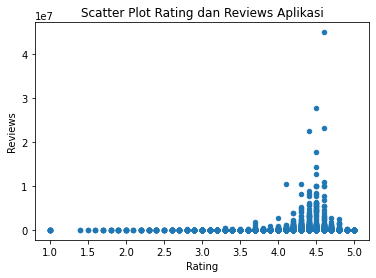


Koefisien Korelasi :  0.07110091100741162


In [15]:
# Korelasi antara Rating dan banyak Review
df.plot(kind = "scatter", x = "Rating", y = "Reviews",  title = "Scatter Plot Rating dan Reviews Aplikasi")
plt.show()

print("\nKoefisien Korelasi : ", df["Rating"].corr(df["Reviews"]))

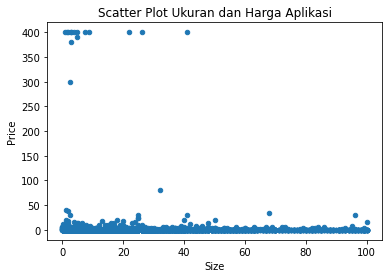


Koefisien Korelasi :  -0.030893547999356324


In [16]:
# Korelasi antara Ukuran dan Harga
df.plot(kind = "scatter", x = "Size", y = "Price",  title = "Scatter Plot Ukuran dan Harga Aplikasi")
plt.show()

print("\nKoefisien Korelasi : ", df["Size"].corr(df["Price"]))